# [**Divers clustering agglomératifs sur un plongement 2D de chiffres**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_digits_linkage.ipynb)<br/>([*Various Agglomerative Clustering on a 2D embedding of digits*](https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html))

Une illustration de diverses options de liaison pour le regroupement agglomératif sur une intégration 2D de l'ensemble de données de chiffres.

Le but de cet exemple est de montrer intuitivement comment se comportent les métriques, et non de trouver de bons clusters pour les chiffres. C'est pourquoi l'exemple fonctionne sur un encastrement 2D.

Ce que cet exemple nous montre, c'est le comportement "de plus en plus riche" du clustering agglomératif qui tend à créer des tailles de cluster inégales.

Ce comportement est prononcé pour la stratégie de liaison moyenne, qui aboutit à quelques clusters avec peu de points de données.

Le cas d'une liaison unique est encore plus pathologique avec un très grand cluster couvrant la plupart des chiffres, un cluster de taille intermédiaire (propre) avec la plupart des chiffres zéro et tous les autres clusters étant tirés de points de bruit autour des franges.

Les autres stratégies de couplage conduisent à des grappes plus uniformément réparties qui sont donc susceptibles d'être moins sensibles à un rééchantillonnage aléatoire de l'ensemble de données.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_linkage_001.png)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_linkage_002.png)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_linkage_003.png)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_linkage_004.png)

Computing embedding
Done.
ward :	0.14s
average :	0.07s
complete :	0.07s
single :	0.02s


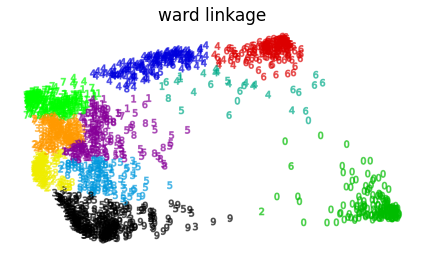

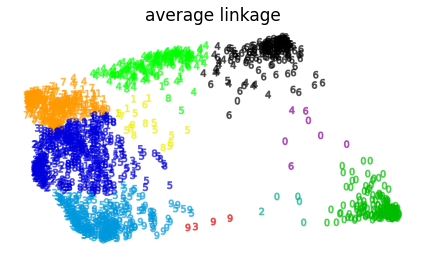

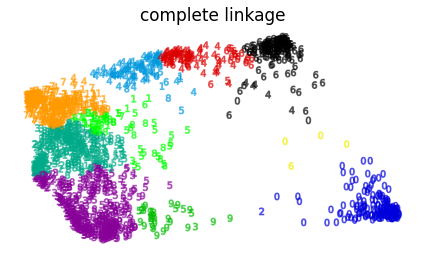

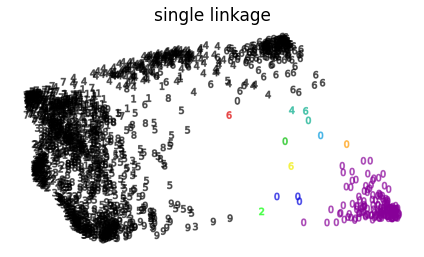

In [1]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)


# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()